<a href="https://colab.research.google.com/github/ArtemBaron/baron_vergeles/blob/main/ml_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [4]:
import seaborn as sns

In [5]:
! gdown --id 1VHcT-kf6yDOZxZkhbugL5n8vqnwc9Qq7

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1VHcT-kf6yDOZxZkhbugL5n8vqnwc9Qq7
To: /content/bmw.csv
100% 593k/593k [00:00<00:00, 117MB/s]


In [6]:
df = pd.read_csv('/content/bmw.csv')

In [7]:
from sklearn.model_selection import train_test_split


In [8]:
train, test = train_test_split(df,train_size=0.6,random_state=42)


In [9]:
val, test = train_test_split(test,train_size=0.5,random_state=42)


In [10]:
! pip install catboost


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 3.0 MB/s eta 0:00:00


In [11]:
from catboost import CatBoostRegressor


In [12]:
X = ['model', 'year', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize']

cat_features = ['model', 'transmission', 'fuelType']

y = ['price']

In [13]:
parameters = {'cat_features': cat_features,
              'eval_metric': 'MAPE',
              'learning_rate': 0.08,
              'random_seed':42,
              'verbose':100}
     

In [14]:
model = CatBoostRegressor(**parameters)


In [15]:
model.fit(train[X],train[y],eval_set=(val[X],val[y]))


0:	learn: 0.4564416	test: 0.4521294	best: 0.4521294 (0)	total: 55.2ms	remaining: 55.2s
100:	learn: 0.0875290	test: 0.0867329	best: 0.0867329 (100)	total: 667ms	remaining: 5.94s
200:	learn: 0.0760834	test: 0.0779235	best: 0.0779235 (200)	total: 1.5s	remaining: 5.97s
300:	learn: 0.0708670	test: 0.0740290	best: 0.0740290 (300)	total: 2.14s	remaining: 4.97s
400:	learn: 0.0676240	test: 0.0718814	best: 0.0718814 (400)	total: 2.95s	remaining: 4.41s
500:	learn: 0.0654070	test: 0.0709221	best: 0.0708594 (496)	total: 3.73s	remaining: 3.72s
600:	learn: 0.0638577	test: 0.0704606	best: 0.0704490 (599)	total: 5.27s	remaining: 3.5s
700:	learn: 0.0622969	test: 0.0698226	best: 0.0698226 (700)	total: 7.09s	remaining: 3.02s
800:	learn: 0.0609583	test: 0.0694169	best: 0.0694004 (791)	total: 8.8s	remaining: 2.19s
900:	learn: 0.0596089	test: 0.0689968	best: 0.0689945 (895)	total: 10.5s	remaining: 1.15s
999:	learn: 0.0584626	test: 0.0686829	best: 0.0686377 (993)	total: 12.3s	remaining: 0us

bestTest = 0.0686

In [16]:
test['price_pred'] = model.predict(test[X])


In [17]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error


In [18]:
def error(y_true,y_pred):
  print(mean_absolute_error(y_true,y_pred))
  print(mean_absolute_percentage_error(y_true,y_pred))

In [19]:
error(test['price'],test['price_pred'])


1537.5600657036578
0.0724718966452533


In [20]:
test['error'] = test['price_pred'] - test['price']


In [21]:
test


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred,error
4984,X6,2019,52990,Semi-Auto,3086,Diesel,145,34.9,3.0,56789.268481,3799.268481
4880,X1,2018,24081,Semi-Auto,13245,Diesel,150,60.1,2.0,22236.888207,-1844.111793
9132,1 Series,2016,12999,Automatic,68949,Petrol,200,43.5,2.0,13529.705791,530.705791
6451,1 Series,2020,11995,Semi-Auto,10,Petrol,150,34.5,2.0,31815.676673,19820.676673
7199,3 Series,2020,29875,Semi-Auto,150,Petrol,145,42.2,2.0,35549.276658,5674.276658
...,...,...,...,...,...,...,...,...,...,...,...
9627,3 Series,2015,14999,Automatic,78680,Diesel,160,52.3,3.0,14193.617089,-805.382911
6096,4 Series,2019,29676,Automatic,7365,Petrol,145,41.5,3.0,30819.807549,1143.807549
1747,5 Series,2019,30570,Automatic,3067,Hybrid,145,49.6,2.0,29782.428096,-787.571904
4023,3 Series,2016,14999,Automatic,70054,Hybrid,0,148.7,2.0,13799.641665,-1199.358335


<Axes: >

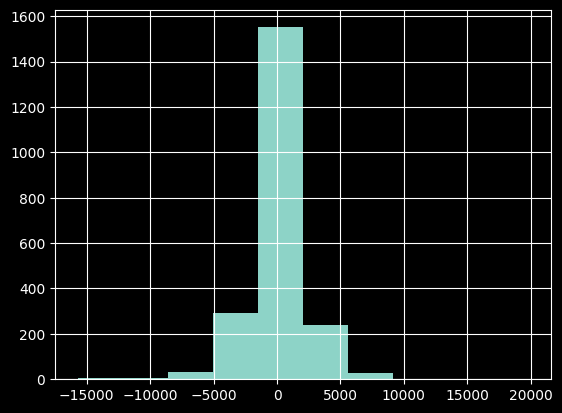

In [22]:
test['error'].hist()

In [23]:
test['error'].mean()

122.08788795070966

In [24]:
test['error_abs']  = abs(test['price_pred'] - test['price'])

In [25]:
  test['error_abs'].describe()

count     2157.000000
mean      1537.560066
std       1676.859544
min          0.083199
25%        489.152540
50%       1073.305750
75%       1946.619471
max      19820.676673
Name: error_abs, dtype: float64

<Axes: >

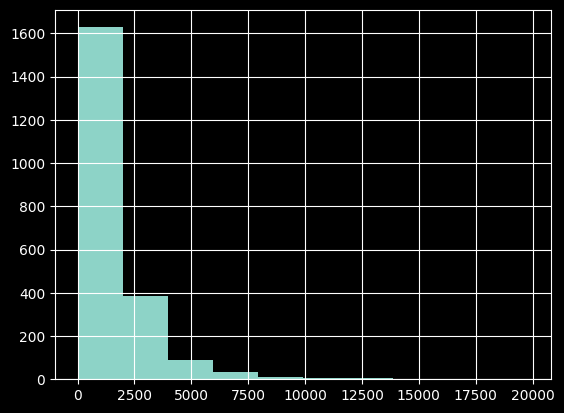

In [26]:
test['error_abs'].hist()

In [27]:
test.sort_values('error_abs',ascending=False).head(10)


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred,error,error_abs
6451,1 Series,2020,11995,Semi-Auto,10,Petrol,150,34.5,2.0,31815.676673,19820.676673,19820.676673
1244,4 Series,2020,47550,Semi-Auto,101,Diesel,145,60.1,2.0,31822.814760,-15727.185240,15727.185240
6866,4 Series,2020,42520,Semi-Auto,102,Diesel,145,65.7,2.0,28016.370190,-14503.629810,14503.629810
6592,M5,2019,70995,Semi-Auto,23,Petrol,145,24.1,4.4,85092.283023,14097.283023,14097.283023
2315,X2,2019,44980,Semi-Auto,500,Diesel,145,58.9,2.0,32052.149452,-12927.850548,12927.850548
6270,M4,2020,59999,Semi-Auto,3000,Petrol,150,28.5,3.0,47193.043921,-12805.956079,12805.956079
947,2 Series,2015,11998,Semi-Auto,30738,Diesel,20,68.9,2.0,24663.932331,12665.932331,12665.932331
6759,4 Series,2020,42495,Semi-Auto,18,Diesel,150,58.9,2.0,30133.732400,-12361.267600,12361.267600
4833,M4,2019,58662,Automatic,3395,Petrol,145,34.0,3.0,46802.901943,-11859.098057,11859.098057
6215,M4,2018,53999,Semi-Auto,8725,Petrol,145,33.6,3.0,42513.071957,-11485.928043,11485.928043


In [28]:
test['price_group'] = pd.qcut(test['price'], 5)

In [29]:
t = test.groupby('price_group')[['error_abs','error']].agg(['count','mean'])


In [30]:
t

error_abs              error            
                        count         mean count        mean
price_group                                                 
(1199.999, 13995.0]       435   911.712080   435  462.229738
(13995.0, 18500.0]        432  1151.556512   432  281.411969
(18500.0, 23131.6]        427  1318.846517   427  254.475675
(23131.6, 29990.0]        432  1749.723698   432  378.241254
(29990.0, 74990.0]        431  2560.143373   431 -768.811293

In [31]:
t.columns = ['_'.join(col).strip() for col in t.columns.values]


In [32]:
t

,error_abs_count,error_abs_mean,error_count,error_mean
price_group,,,,
"(1199.999, 13995.0]",435,911.712080,435,462.229738
"(13995.0, 18500.0]",432,1151.556512,432,281.411969
"(18500.0, 23131.6]",427,1318.846517,427,254.475675
"(23131.6, 29990.0]",432,1749.723698,432,378.241254
"(29990.0, 74990.0]",431,2560.143373,431,-768.811293


In [33]:
t= t.drop('error_count', axis = 1)

In [34]:
t['mean_error_diff'] = t['error_abs_mean'] - test['error_abs'].mean()


In [35]:
t['mean_error'] = test['error_abs'].mean()


In [36]:
t

,error_abs_count,error_abs_mean,error_mean,mean_error_diff,mean_error
price_group,,,,,
"(1199.999, 13995.0]",435,911.712080,462.229738,-625.847985,1537.560066
"(13995.0, 18500.0]",432,1151.556512,281.411969,-386.003554,1537.560066
"(18500.0, 23131.6]",427,1318.846517,254.475675,-218.713549,1537.560066
"(23131.6, 29990.0]",432,1749.723698,378.241254,212.163632,1537.560066
"(29990.0, 74990.0]",431,2560.143373,-768.811293,1022.583307,1537.560066


In [37]:
import seaborn as sns
cm = sns.dark_palette("red", as_cmap=True)
     

In [38]:
t.style.background_gradient(cmap=cm,subset=['mean_error_diff'])


,error_abs_count,error_abs_mean,error_mean,mean_error_diff,mean_error
price_group,,,,,
"(1199.999, 13995.0]",435,911.712080,462.229738,-625.847985,1537.560066
"(13995.0, 18500.0]",432,1151.556512,281.411969,-386.003554,1537.560066
"(18500.0, 23131.6]",427,1318.846517,254.475675,-218.713549,1537.560066
"(23131.6, 29990.0]",432,1749.723698,378.241254,212.163632,1537.560066
"(29990.0, 74990.0]",431,2560.143373,-768.811293,1022.583307,1537.560066


In [39]:
t = test.groupby('year')[['error_abs','error']].agg(['count','mean'])


In [40]:
t

error_abs              error             
         count         mean count         mean
year                                          
1996         1  6339.136209     1  6339.136209
1999         1   890.056901     1   890.056901
2001         1   927.316449     1   927.316449
2002         2  2175.440983     2 -1069.308819
2003         1  1482.424637     1 -1482.424637
2004         4  1902.279284     4  -305.313519
2006         3  1660.249510     3   775.274447
2007         2  1003.062275     2  1003.062275
2008         4  3182.698112     4  3182.698112
2009         6   703.048594     6    84.183919
2010         3  1059.354320     3   695.204249
2011        12   605.873341    12   428.301728
2012        28   888.946275    28    26.555228
2013        73  1032.750273    73   -18.604265
2014        97   880.366289    97   -63.896372
2015       179  1323.045823   179   260.200329
2016       360  1019.401473   360    60.056974
2017       330  1199.555510   330   -66.371735
2018       168  1503.540152   168   109.813056
2019       726  1880.050190   726   145.897776
2020       156  2933.862809   156   457.594366

In [41]:
t.columns = ['_'.join(col).strip() for col in t.columns.values]


In [42]:
t

,error_abs_count,error_abs_mean,error_count,error_mean
year,,,,
1996,1,6339.136209,1,6339.136209
1999,1,890.056901,1,890.056901
2001,1,927.316449,1,927.316449
2002,2,2175.440983,2,-1069.308819
2003,1,1482.424637,1,-1482.424637
2004,4,1902.279284,4,-305.313519
2006,3,1660.249510,3,775.274447
2007,2,1003.062275,2,1003.062275
2008,4,3182.698112,4,3182.698112


In [43]:
t= t.drop('error_count', axis = 1)

In [44]:
t['mean_error_diff'] = t['error_abs_mean'] - test['error_abs'].mean()


In [45]:
t['mean_error'] = test['error_abs'].mean()


In [46]:
t

,error_abs_count,error_abs_mean,error_mean,mean_error_diff,mean_error
year,,,,,
1996,1,6339.136209,6339.136209,4801.576144,1537.560066
1999,1,890.056901,890.056901,-647.503164,1537.560066
2001,1,927.316449,927.316449,-610.243617,1537.560066
2002,2,2175.440983,-1069.308819,637.880917,1537.560066
2003,1,1482.424637,-1482.424637,-55.135428,1537.560066
2004,4,1902.279284,-305.313519,364.719218,1537.560066
2006,3,1660.249510,775.274447,122.689445,1537.560066
2007,2,1003.062275,1003.062275,-534.497791,1537.560066
2008,4,3182.698112,3182.698112,1645.138047,1537.560066


In [47]:
t.style.background_gradient(cmap=cm,subset=['mean_error_diff'])


,error_abs_count,error_abs_mean,error_mean,mean_error_diff,mean_error
year,,,,,
1996,1,6339.136209,6339.136209,4801.576144,1537.560066
1999,1,890.056901,890.056901,-647.503164,1537.560066
2001,1,927.316449,927.316449,-610.243617,1537.560066
2002,2,2175.440983,-1069.308819,637.880917,1537.560066
2003,1,1482.424637,-1482.424637,-55.135428,1537.560066
2004,4,1902.279284,-305.313519,364.719218,1537.560066
2006,3,1660.249510,775.274447,122.689445,1537.560066
2007,2,1003.062275,1003.062275,-534.497791,1537.560066
2008,4,3182.698112,3182.698112,1645.138047,1537.560066


In [50]:
def print_error(col):
  t = test.groupby(col)[['error_abs','error']].agg(['count','mean'])
  t.columns = ['_'.join(col).strip() for col in t.columns.values]
  t= t.drop('error_count', axis = 1)
  t['mean_error_diff'] = t['error_abs_mean'] - test['error_abs'].mean()
  t['mean_error'] = test['error_abs'].mean()
  display(t.style.background_gradient(cmap=cm,subset=['mean_error_diff']))




In [52]:
print_error('transmission')

,error_abs_count,error_abs_mean,error_mean,mean_error_diff,mean_error
transmission,,,,,
Automatic,695,1494.208611,36.406949,-43.351455,1537.560066
Manual,504,1079.145745,142.507574,-458.414320,1537.560066
Semi-Auto,958,1810.180189,173.504100,272.620124,1537.560066


In [53]:
test['mileage_group'] = pd.qcut(test['mileage'],5)


In [54]:
print_error('mileage_group')


,error_abs_count,error_abs_mean,error_mean,mean_error_diff,mean_error
mileage_group,,,,,
"(0.999, 4063.2]",432,2433.845556,293.238143,896.285490,1537.560066
"(4063.2, 9825.4]",431,1725.080432,67.411269,187.520367,1537.560066
"(9825.4, 24299.0]",432,1395.285364,65.804632,-142.274702,1537.560066
"(24299.0, 43519.8]",430,1141.553935,13.742028,-396.006130,1537.560066
"(43519.8, 190000.0]",432,990.635754,169.615201,-546.924311,1537.560066


In [57]:
test['tax_group'] = pd.qcut(test['tax'], 5, duplicates='drop')

In [58]:
print_error('tax_group')


,error_abs_count,error_abs_mean,error_mean,mean_error_diff,mean_error
tax_group,,,,,
"(-0.001, 125.0]",512,823.722414,91.176598,-713.837651,1537.560066
"(125.0, 145.0]",1131,1807.424736,117.301327,269.864670,1537.560066
"(145.0, 150.0]",252,1707.575874,118.514950,170.015808,1537.560066
"(150.0, 580.0]",262,1604.063700,206.593848,66.503634,1537.560066


In [59]:
test.groupby('tax_group')[['price', 'year']].agg(['mean', 'count'])

price               year      
                         mean count         mean count
tax_group                                             
(-0.001, 125.0]  13264.859375   512  2015.365234   512
(125.0, 145.0]   27536.747126  1131  2018.382847  1131
(145.0, 150.0]   25288.376984   252  2018.166667   252
(150.0, 580.0]   18207.576336   262  2014.118321   262

In [61]:
test['mpg_group'] = pd.qcut(test['mpg'], 5, duplicates='drop')

In [62]:
print_error('mpg_group')


,error_abs_count,error_abs_mean,error_mean,mean_error_diff,mean_error
mpg_group,,,,,
"(5.499, 42.2]",444,2159.412978,227.429403,621.852912,1537.560066
"(42.2, 50.4]",487,1664.200649,361.406267,126.640583,1537.560066
"(50.4, 55.4]",380,1517.852124,46.756860,-19.707942,1537.560066
"(55.4, 64.2]",449,1238.191642,-105.163252,-299.368424,1537.560066
"(64.2, 470.8]",397,1044.181685,39.825594,-493.378380,1537.560066


In [63]:
test['engine_group'] = pd.cut(test['engineSize'],[0,1.5,2,float('inf')])


In [64]:
print_error('engine_group')


,error_abs_count,error_abs_mean,error_mean,mean_error_diff,mean_error
engine_group,,,,,
"(0.0, 1.5]",279,1135.531674,149.248281,-402.028392,1537.560066
"(1.5, 2.0]",1347,1423.236324,60.610112,-114.323742,1537.560066
"(2.0, inf]",524,2049.868683,265.297889,512.308617,1537.560066


<Axes: xlabel='year'>

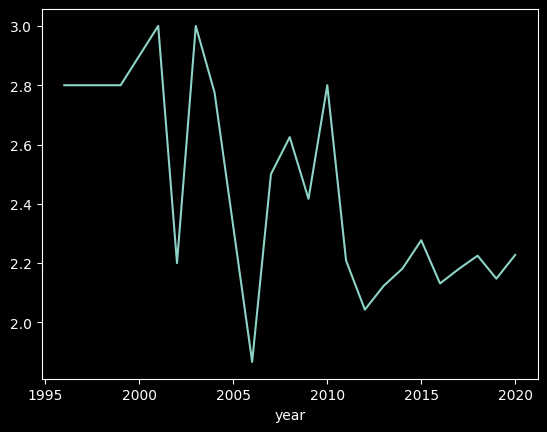

In [65]:
test.groupby('year')['engineSize'].mean().plot()


In [66]:
model.get_feature_importance(prettified=True   )

,Feature Id,Importances
0,year,21.663393
1,engineSize,19.886510
2,mileage,17.956035
3,model,16.587238
4,mpg,14.284600
5,fuelType,4.843232
6,transmission,3.381356
7,tax,1.397635


Shap

In [67]:
! pip install shap


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 10.5 MB/s eta 0:00:00


In [69]:
import shap
shap.initjs()

In [70]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(test[X])

In [71]:
pd.DataFrame(shap_values,columns=X)


,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,8311.485019,3980.876570,1463.005737,4864.958351,3232.159966,196.716562,7303.931770,4667.784345
1,-562.037416,301.743835,951.979426,519.712494,-24.075024,64.161187,-1051.225627,-731.720828
2,-2557.859291,-1952.004143,228.397317,-4370.190404,-741.041540,-209.530425,1371.355711,-1007.771594
3,-3191.649446,4348.735937,599.557903,4344.961576,-1474.265490,-344.199525,7046.878577,-2282.693020
4,137.767669,6915.041139,897.684328,6120.097476,-1272.080140,54.600912,1584.427320,-1656.612208
...,...,...,...,...,...,...,...,...
2152,-1224.126471,-3428.321075,115.041872,-5570.789418,347.522997,-7.006045,-930.727806,2123.672872
2153,-937.230018,4128.877652,449.394203,1939.237643,-1539.789666,170.712067,885.092764,2955.162742
2154,1331.256544,3296.088696,254.481261,3740.499059,454.362542,263.610745,-1327.864100,-998.356812
2155,-1168.529298,-2089.345887,191.549832,-4610.373744,1502.199214,-370.595925,-1726.061783,-697.550907


In [72]:
train['price'].mean()


22768.483920841063

In [73]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], test[X].iloc[0,:])

<Axes: >

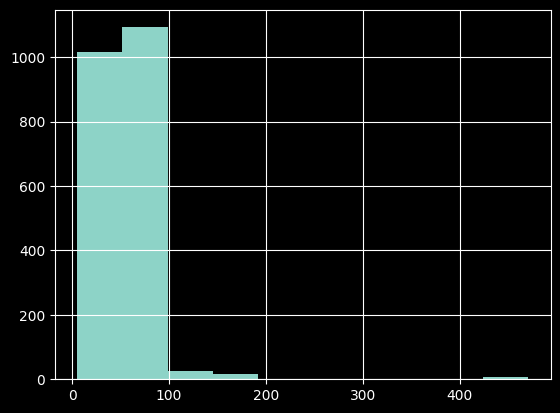

In [74]:
test['mpg'].hist()


In [75]:
(test['mpg'] < 34.9).mean()


0.06212331942512749

In [76]:
shap_cols = [x+'_shap' for x in X]


In [77]:
shap_cols


['model_shap',
 'year_shap',
 'transmission_shap',
 'mileage_shap',
 'fuelType_shap',
 'tax_shap',
 'mpg_shap',
 'engineSize_shap']

In [78]:
shap_values_df = pd.DataFrame(shap_values,columns=shap_cols)


In [79]:
shap_values_df


,model_shap,year_shap,transmission_shap,mileage_shap,fuelType_shap,tax_shap,mpg_shap,engineSize_shap
0,8311.485019,3980.876570,1463.005737,4864.958351,3232.159966,196.716562,7303.931770,4667.784345
1,-562.037416,301.743835,951.979426,519.712494,-24.075024,64.161187,-1051.225627,-731.720828
2,-2557.859291,-1952.004143,228.397317,-4370.190404,-741.041540,-209.530425,1371.355711,-1007.771594
3,-3191.649446,4348.735937,599.557903,4344.961576,-1474.265490,-344.199525,7046.878577,-2282.693020
4,137.767669,6915.041139,897.684328,6120.097476,-1272.080140,54.600912,1584.427320,-1656.612208
...,...,...,...,...,...,...,...,...
2152,-1224.126471,-3428.321075,115.041872,-5570.789418,347.522997,-7.006045,-930.727806,2123.672872
2153,-937.230018,4128.877652,449.394203,1939.237643,-1539.789666,170.712067,885.092764,2955.162742
2154,1331.256544,3296.088696,254.481261,3740.499059,454.362542,263.610745,-1327.864100,-998.356812
2155,-1168.529298,-2089.345887,191.549832,-4610.373744,1502.199214,-370.595925,-1726.061783,-697.550907


In [80]:
test


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred,error,error_abs,price_group,mileage_group,tax_group,mpg_group,engine_group
4984,X6,2019,52990,Semi-Auto,3086,Diesel,145,34.9,3.0,56789.268481,3799.268481,3799.268481,"(29990.0, 74990.0]","(0.999, 4063.2]","(125.0, 145.0]","(5.499, 42.2]","(2.0, inf]"
4880,X1,2018,24081,Semi-Auto,13245,Diesel,150,60.1,2.0,22236.888207,-1844.111793,1844.111793,"(23131.6, 29990.0]","(9825.4, 24299.0]","(145.0, 150.0]","(55.4, 64.2]","(1.5, 2.0]"
9132,1 Series,2016,12999,Automatic,68949,Petrol,200,43.5,2.0,13529.705791,530.705791,530.705791,"(1199.999, 13995.0]","(43519.8, 190000.0]","(150.0, 580.0]","(42.2, 50.4]","(1.5, 2.0]"
6451,1 Series,2020,11995,Semi-Auto,10,Petrol,150,34.5,2.0,31815.676673,19820.676673,19820.676673,"(1199.999, 13995.0]","(0.999, 4063.2]","(145.0, 150.0]","(5.499, 42.2]","(1.5, 2.0]"
7199,3 Series,2020,29875,Semi-Auto,150,Petrol,145,42.2,2.0,35549.276658,5674.276658,5674.276658,"(23131.6, 29990.0]","(0.999, 4063.2]","(125.0, 145.0]","(5.499, 42.2]","(1.5, 2.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9627,3 Series,2015,14999,Automatic,78680,Diesel,160,52.3,3.0,14193.617089,-805.382911,805.382911,"(13995.0, 18500.0]","(43519.8, 190000.0]","(150.0, 580.0]","(50.4, 55.4]","(2.0, inf]"
6096,4 Series,2019,29676,Automatic,7365,Petrol,145,41.5,3.0,30819.807549,1143.807549,1143.807549,"(23131.6, 29990.0]","(4063.2, 9825.4]","(125.0, 145.0]","(5.499, 42.2]","(2.0, inf]"
1747,5 Series,2019,30570,Automatic,3067,Hybrid,145,49.6,2.0,29782.428096,-787.571904,787.571904,"(29990.0, 74990.0]","(0.999, 4063.2]","(125.0, 145.0]","(42.2, 50.4]","(1.5, 2.0]"
4023,3 Series,2016,14999,Automatic,70054,Hybrid,0,148.7,2.0,13799.641665,-1199.358335,1199.358335,"(13995.0, 18500.0]","(43519.8, 190000.0]","(-0.001, 125.0]","(64.2, 470.8]","(1.5, 2.0]"


In [83]:
test_shap = pd.concat([test.reset_index(),shap_values_df],axis=1)
test_shap = test_shap.sort_values('error_abs',ascending=False)


In [82]:
test_shap

,index,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,...,mpg_group,engine_group,model_shap,year_shap,transmission_shap,mileage_shap,fuelType_shap,tax_shap,mpg_shap,engineSize_shap
0,4984,X6,2019,52990,Semi-Auto,3086,Diesel,145,34.9,3.0,...,"(5.499, 42.2]","(2.0, inf]",8311.485019,3980.876570,1463.005737,4864.958351,3232.159966,196.716562,7303.931770,4667.784345
1,4880,X1,2018,24081,Semi-Auto,13245,Diesel,150,60.1,2.0,...,"(55.4, 64.2]","(1.5, 2.0]",-562.037416,301.743835,951.979426,519.712494,-24.075024,64.161187,-1051.225627,-731.720828
2,9132,1 Series,2016,12999,Automatic,68949,Petrol,200,43.5,2.0,...,"(42.2, 50.4]","(1.5, 2.0]",-2557.859291,-1952.004143,228.397317,-4370.190404,-741.041540,-209.530425,1371.355711,-1007.771594
3,6451,1 Series,2020,11995,Semi-Auto,10,Petrol,150,34.5,2.0,...,"(5.499, 42.2]","(1.5, 2.0]",-3191.649446,4348.735937,599.557903,4344.961576,-1474.265490,-344.199525,7046.878577,-2282.693020
4,7199,3 Series,2020,29875,Semi-Auto,150,Petrol,145,42.2,2.0,...,"(5.499, 42.2]","(1.5, 2.0]",137.767669,6915.041139,897.684328,6120.097476,-1272.080140,54.600912,1584.427320,-1656.612208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2152,9627,3 Series,2015,14999,Automatic,78680,Diesel,160,52.3,3.0,...,"(50.4, 55.4]","(2.0, inf]",-1224.126471,-3428.321075,115.041872,-5570.789418,347.522997,-7.006045,-930.727806,2123.672872
2153,6096,4 Series,2019,29676,Automatic,7365,Petrol,145,41.5,3.0,...,"(5.499, 42.2]","(2.0, inf]",-937.230018,4128.877652,449.394203,1939.237643,-1539.789666,170.712067,885.092764,2955.162742
2154,1747,5 Series,2019,30570,Automatic,3067,Hybrid,145,49.6,2.0,...,"(42.2, 50.4]","(1.5, 2.0]",1331.256544,3296.088696,254.481261,3740.499059,454.362542,263.610745,-1327.864100,-998.356812
2155,4023,3 Series,2016,14999,Automatic,70054,Hybrid,0,148.7,2.0,...,"(64.2, 470.8]","(1.5, 2.0]",-1168.529298,-2089.345887,191.549832,-4610.373744,1502.199214,-370.595925,-1726.061783,-697.550907


In [84]:
shap.initjs()
shap.force_plot(explainer.expected_value, test_shap[shap_cols].values[0,:], test_shap[X].iloc[0,:])

In [ ]:
pd.options.display.max_columns = 100


<Axes: >

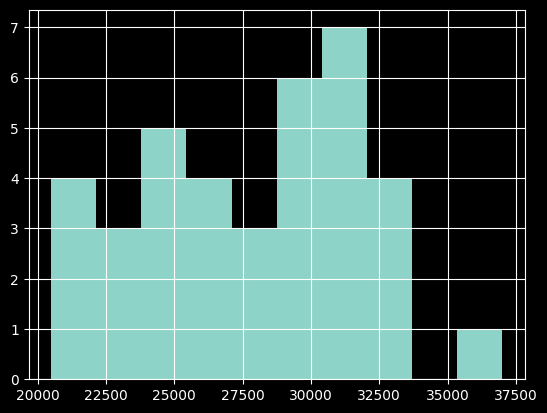

In [85]:
train[(train['model'] == ' 1 Series')&(train['year'] == 2020)]['price'].hist()


<Axes: >

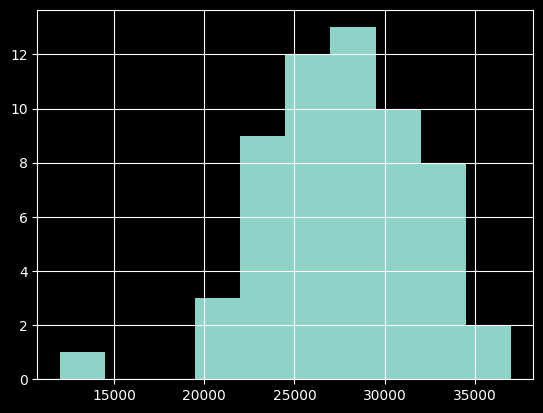

In [86]:
df[(df['model'] == ' 1 Series')&(df['year'] == 2020)]['price'].hist()


In [87]:
shap.initjs()
shap.force_plot(explainer.expected_value, test_shap[shap_cols].head(10).values,
                                          test_shap[X].head(10))
     

In [88]:
X


['model',
 'year',
 'transmission',
 'mileage',
 'fuelType',
 'tax',
 'mpg',
 'engineSize']

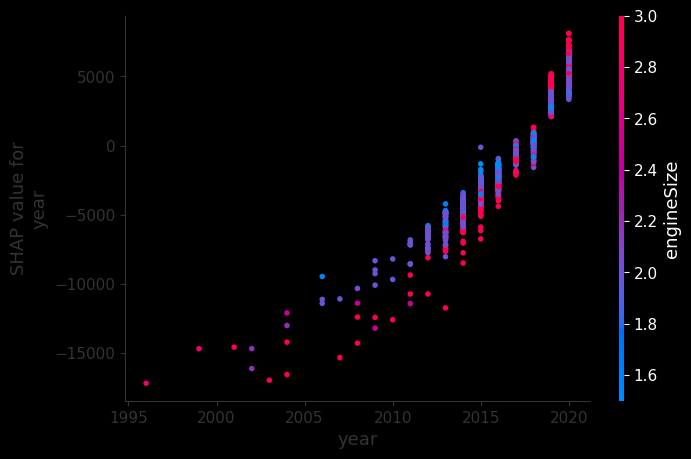

In [89]:
shap.dependence_plot("year", shap_values, test[X])


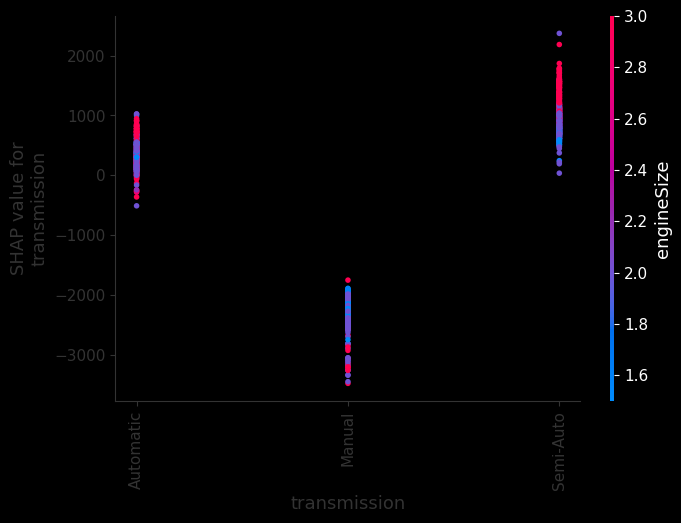

In [90]:
shap.dependence_plot("transmission", shap_values, test[X])


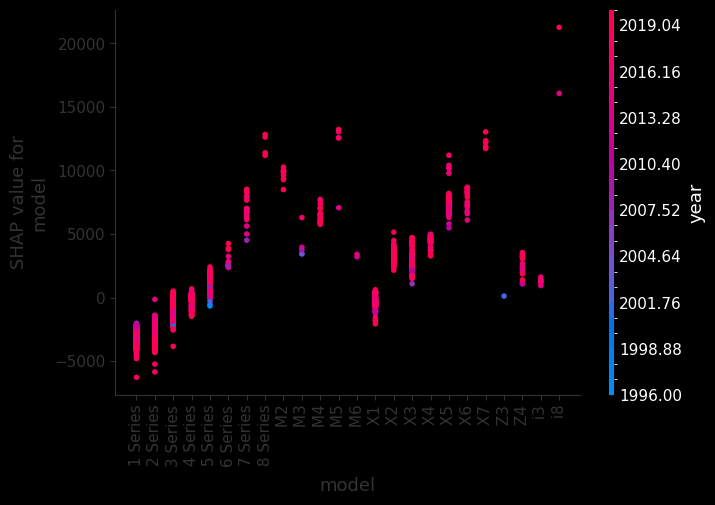

In [91]:
shap.dependence_plot("model", shap_values, test[X])


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


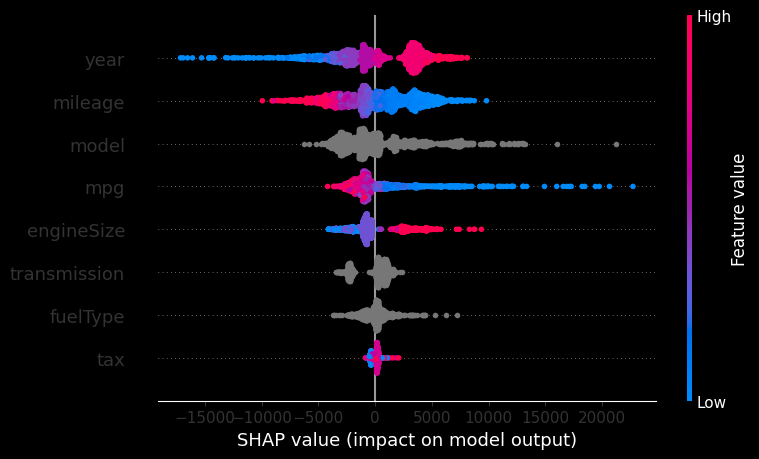

In [92]:
shap.summary_plot(shap_values, test[X])
